In [1]:
import sys
sys.path.append('../')
from matplotlib import pyplot as plt
from evolution import Evolver
from tqdm import tqdm
import numpy as np


In [2]:
non_point_mutations = {'+' : 1,    #single residue insertion
                       '-' : 1,    #single residue deletion
                       '*' : 0.3,    #partial duplication
                       '/' : 0.2,    #random insertion 
                       '%' : 0.8,    #partial deletion
                       'p' : 0.1,   #cyrcular permutation
                       'd' : 0.01  #full duplication    
                       } 


Evolver.non_point_mutations = non_point_mutations
evolver = Evolver('codonrates_opm')

{j:round(i/sum(evolver.evoldict.values()),4) for i, j in zip(evolver.evoldict.values(), evolver.evoldict.keys())}

{'A': 0.0635,
 'C': 0.0317,
 'D': 0.0317,
 'E': 0.0317,
 'F': 0.0317,
 'G': 0.0635,
 'H': 0.0317,
 'I': 0.0476,
 'K': 0.0317,
 'L': 0.0952,
 'M': 0.0159,
 'N': 0.0317,
 'P': 0.0635,
 'Q': 0.0317,
 'R': 0.0952,
 'S': 0.0952,
 'T': 0.0635,
 'V': 0.0635,
 'W': 0.0159,
 'Y': 0.0317,
 '+': 0.0159,
 '-': 0.0159}

100%|██████████| 10000/10000 [03:53<00:00, 42.79it/s]


Text(0.5, 0, 'Number of cycles')

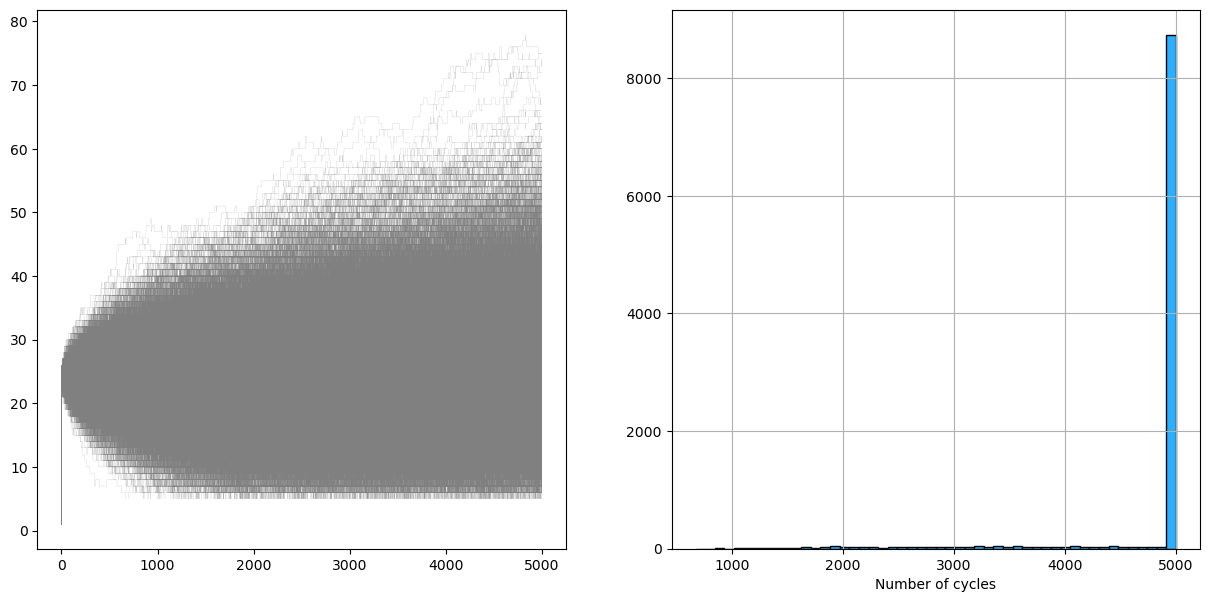

In [5]:
def ratetest(l):
    seq = "A" * l
    x = [1]
    for i in range(5000):
        seq = evolver.mutate(seq)[0]
        x.append(len(seq))
        if len(seq) < 6:
            #print(f'too short after {i} steps')
            break
    return x , len(x)


n_cycles = []
len_xs = []
xs = []
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)

for i in tqdm(range(10000)):
    x, len_x = ratetest(24)
    n_cycles.append(len_x)
    xs.append(x)
    len_xs = [len(x)]
    ax[0].plot(x, '-', color='grey', linewidth=0.1)
    plt.grid(True, which="both")
    plt.xlabel('Number of cycles')
#ax[0].set_ylim([0,100])
ax[1].hist(n_cycles, bins=50, facecolor = '#2ab0ff', edgecolor='black', linewidth=1)
plt.grid(True, which="both")
plt.xlabel('Number of cycles')


In [4]:
round(np.random.normal(10))

9

In [5]:
import pandas as pd
import sys
sys.path.append('../')
from evolution import Evolver

evolver = Evolver('codonrates')
df = pd.DataFrame({'sequence':['A1','A2','A3','A4','A5'] , 'score': [10] * 5})
df2 = pd.DataFrame({'sequence':['B'] * 5, 'score': [5] * 5})





In [6]:
evolver.select(df, df2, 5, selection_mode='weak', norepeat=True)

,sequence,score
3,A4,10
1,A2,10
4,A5,10
0,A1,10
2,A3,10


In [7]:
df.sample(6,replace=(not False))

,sequence,score
3,A4,10
1,A2,10
4,A5,10
3,A4,10
4,A5,10
3,A4,10


(array([1.15361771e-04, 1.15361771e-04, 0.00000000e+00, 4.61447085e-04,
        3.46085314e-04, 5.76808856e-04, 6.92170627e-04, 6.92170627e-04,
        1.26897948e-03, 1.49970303e-03, 2.53795897e-03, 2.53795897e-03,
        2.19187365e-03, 3.92230022e-03, 4.49910908e-03, 6.46025919e-03,
        7.72923867e-03, 1.18822624e-02, 1.32666037e-02, 1.45355832e-02,
        2.38798866e-02, 2.36491631e-02, 3.02247841e-02, 3.79540227e-02,
        4.39528348e-02, 5.13359882e-02, 6.57562096e-02, 8.02917928e-02,
        8.43294547e-02, 1.07863256e-01, 1.13977430e-01, 1.30589525e-01,
        1.48009152e-01, 1.67389930e-01, 1.90808370e-01, 2.07997273e-01,
        2.27378051e-01, 2.48027808e-01, 2.66716415e-01, 2.84712851e-01,
        3.04439714e-01, 3.41355481e-01, 3.42278375e-01, 3.57967576e-01,
        3.74002862e-01, 3.89115254e-01, 3.94075810e-01, 4.02035773e-01,
        4.04458370e-01, 3.95806237e-01, 4.10687905e-01, 3.76771545e-01,
        3.72041712e-01, 3.54506723e-01, 3.48161825e-01, 3.440088

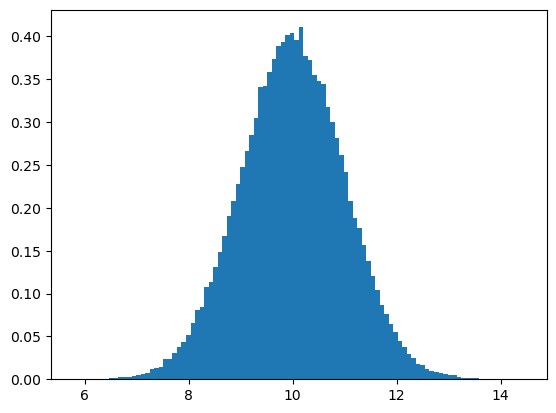

In [8]:
plt.hist(np.random.normal(loc=10, scale=1.0, size=100000), bins=100, density=True)

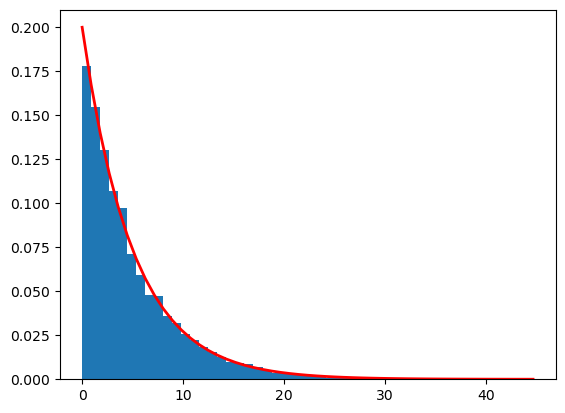

In [4]:
import matplotlib.pyplot as plt
import scipy.special as sps  

shape, scale = 1, 5  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)

count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()


(array([ 55., 112., 231., 320., 359., 372., 455., 447., 451., 475., 461.,
        471., 459., 395., 405., 385., 387., 325., 310., 288., 273., 252.,
        231., 190., 197., 171., 173., 152., 125., 134., 120.,  91.,  90.,
         66.,  59.,  48.,  47.,  38.,  54.,  38.,  30.,  37.,  27.,  24.,
         17.,  14.,  16.,  17.,   8.,  11.,   7.,  12.,   6.,  10.,   7.,
          4.,   4.,   3.,   3.,   2.,   3.,   3.,   1.,   5.,   1.,   1.,
          0.,   1.,   1.,   0.,   1.,   2.,   2.,   1.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.31613052,  1.08452242,  1.85291432,  2.62130623,  3.38969813,
         4.15809003,  4.92648193,  5.69487384,  6.46326574,  7.23165764,
         8.00004954,  8.76844144,  9.53683335, 10.30522525, 11.07361715,
        11.84200905, 12.61040096, 13.37879286, 14.14718476, 14.91557666,
        15.68396857, 16.45

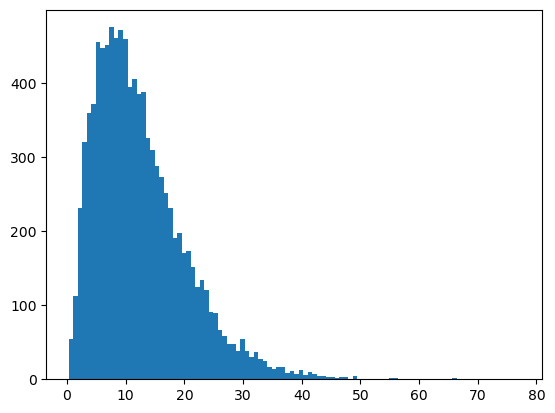

In [17]:
s = np.random.gamma(2.5, 5, 10000)
plt.hist(s, 100)